# Using Climate Data - Introduction to Climate Change

* Created by Stephen Haddad and Maria Athanassiadou
* Organisation - Met Office Informatics Lab

In this tutorial we will be looking at how easy it is to access and use climate to understand the impact of climate change on small businesses in a local area. But first we will address the question of why we might want to do this. So we will start by considering what is climate change, what climate data is available and how individuals and businesses are affected by climate impacts.


## Overview

In this notebook we will look at:
* The difference between weather and climate
* The history of research into global warming and climate change
* What data is available to study climate change and its impacts

## Weather and Climate

https://www.metoffice.gov.uk/weather/climate 

What is the difference between the weather and the climate? They're both describing the atmosphere in terms of temperature, humidity, wind, rain etc. So why do we have the two separate terms to things that sound similar? The main difference between weather and climate is that they each refer to a different timescale. Weather describes the conditions of the atmosphere over hourly or daily measurements such as temperature, rainfall, cloudiness, sunshine, and wind speeds. Climate, on the other hand, is the average of these conditions over longer time periods ranging from years to decades.

In the words of Robert Heinlein, *Climate is what you expect, weather is what you get*. Perhaps even more simply, *Weather is how you choose your outfit, climate is how you choose your wardrobe*.

https://www.youtube.com/watch?v=bjwmrg__ZVw

So to translate that into data terms, what does weather data look like and how is climate data different.

Weather data examples:
* the current air temperature and humidity
* the amount of rain the fell in the past 12 hours
* the current wind speed and direction
* maximum gust of wind in the last hour
* The total energy of the solar radiation recorded at a location today

Climate Data Examples:
* the average maximum temperature for a location for a particular month
* the number of days with precipitation greater than 5mm
* the average wind speed for a particular month
* the prevailing wind direction in a particular month and location
* the average daily solar radiation energy for a particular location and month


## History of Climate Research

Discovery of Global Warming

Studying Climate Change

## Introduction to climate datasets

In order to understand the past, present and future climate, the Met Office and other other climate researchers need to gather and produce datasets. A starting point for a lot of research is to take some measurements, and climate science is no different. The Met Office was a *data driver organisation* and a user of *big data* well before either of those terms were fashionable or widely used!

What sort of data is produced and used for climate research? We have two main sources for studying the climate: observations and simulations.


### Observational Datasets

Our observational datasets aim to tell us about the current and past states of the climate. We have a variety of different ways of measuring the climate:

* ground stations - traditional weather stations with wet and dry bulb thermometers, rain guages etc.
   * The oldest observational record in the world is the Central England Temperature record, going back to 1659. https://www.metoffice.gov.uk/hadobs/hadcet/
   * We have a network of weather stations across the UK https://www.metoffice.gov.uk/research/climate/maps-and-data/uk-synoptic-and-climate-stations
   * Through the World Meteorological Organisation (WMO) weather observations are shared freely around the world. https://public.wmo.int/en
* satellite observations -  since the advent of artificial satellites orbiting the earth in the 1960's we have been able to use this high-level view to make much more comprehensive measurements of weather and climate, especially in sparsely populated areas and over the oceans where previously there were few or no measurements e.g. the Southern Ocean, Africa.
  * The UK participates in the EUMetSat project https://view.eumetsat.int/productviewer?v=default
* In order to understand how climate changes over long periods of time, we need to look for data that goes back further than a few hundred years. This is called *Paleoclimate*. Here look for indirect measurments of key physical levels such as temperature or levels of carbon dioxide in the atmosphere.
  * Indirect measurments include ice cores, tree growth rings, isotopes of certain elements etc.


There are lots of different sorts of measurements that we collect. One of the tasks of the Met Office and similar organisations is to join the different data sources together into a single *gridded* climate dataset that covers the whole of the UK or the whole of the surface of the earth.
* The Met Office produced the *HadCRUT* temperature dataset: https://www.metoffice.gov.uk/hadobs/hadcrut5/
* ECWMF produces a *reanalysis* which is a physically consistent simulation of the atmosphere constrained by observations: https://www.ecmwf.int/en/forecasts/datasets/reanalysis-datasets/era5


In [1]:
import boto3
import botocore
import datetime
import matplotlib.pyplot as plt
import os.path
import s3fs

In [2]:
import xarray as xr
import matplotlib.pyplot
import iris
import iris.quickplot
import cartopy.crs

In [3]:
era5_bucket = 'era5-pds'

# AWS access / secret keys required
s3 = boto3.resource('s3')
bucket = s3.Bucket(era5_bucket)

# No AWS keys required
client = boto3.client('s3', config=botocore.client.Config(signature_version=botocore.UNSIGNED))

In [7]:
current_var = 'air_temperature_at_2_metres'
current_month = datetime.datetime(2019,1,1)

In [9]:
fs1 = s3fs.S3FileSystem()
path1 = f's3://{era5_bucket}/{current_month.year:04d}/{current_month.month:02d}/data/{current_var}.nc'
fileObj1 = fs1.open(path1)
temp_201901 = xr.open_dataset(fileObj1, engine='h5netcdf')
temp_201901

<xarray.Dataset>
Dimensions:                      (lat: 721, lon: 1440, time0: 744)
Coordinates:
  * lon                          (lon) float32 0.0 0.25 0.5 ... 359.5 359.8
  * lat                          (lat) float32 90.0 89.75 89.5 ... -89.75 -90.0
  * time0                        (time0) datetime64[ns] 2019-01-01 ... 2019-0...
Data variables:
    air_temperature_at_2_metres  (time0, lat, lon) float32 ...
Attributes:
    source:       Reanalysis
    institution:  ECMWF
    title:        ERA5 forecasts

In [14]:
tem_cube = temp_201901[current_var][0,:,:].to_iris()

In [15]:
tem_cube

<iris 'Cube' of air_temperature / (K) (latitude: 721; longitude: 1440)>

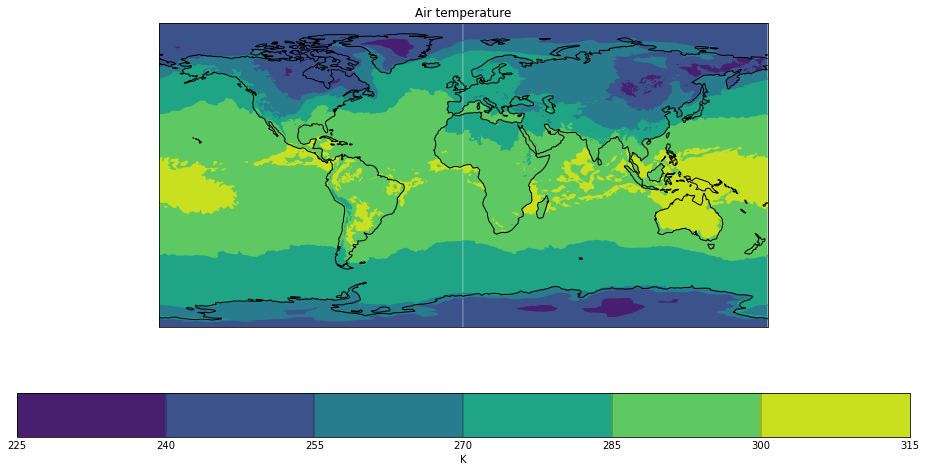

In [20]:
fig1 = matplotlib.pyplot.figure(figsize=(16,8))
ax1 = fig1.add_subplot(1,1,1,projection=cartopy.crs.PlateCarree())
iris.quickplot.contourf(tem_cube,axes=ax1)
ax1.coastlines()

In [21]:
temp_ts = temp_201901[current_var][:, 180, 720].to_iris()

In [22]:
temp_ts

Air Temperature (K),time
Shape,744
Dimension coordinates,
time,x
Scalar coordinates,
latitude,45.0 degrees_north
longitude,180.0 degrees_east
Attributes,
least_significant_digit,[1]
nameCDM,2_metre_temperature_surface
nameECMWF,2 metre temperature


In [25]:
temp_ts.data.data

array([277.625 , 277.5625, 277.5   , 277.5   , 277.4375, 277.4375,
       277.375 , 277.25  , 277.125 , 276.9375, 276.8125, 276.75  ,
       276.875 , 276.875 , 276.5   , 276.75  , 276.8125, 276.875 ,
       276.9375, 276.9375, 276.5625, 276.3125, 276.625 , 276.875 ,
       277.    , 277.    , 276.8125, 276.8125, 276.9375, 277.    ,
       277.    , 276.9375, 276.875 , 276.875 , 276.5   , 276.6875,
       276.75  , 276.5625, 275.9375, 275.75  , 275.8125, 276.    ,
       276.25  , 276.4375, 276.6875, 276.8125, 277.    , 276.875 ,
       276.8125, 276.8125, 276.8125, 276.8125, 276.9375, 277.125 ,
       277.375 , 277.5   , 277.3125, 277.25  , 277.375 , 277.4375,
       277.5   , 277.5   , 277.4375, 277.4375, 277.375 , 277.4375,
       277.5   , 277.625 , 277.8125, 278.0625, 277.9375, 278.25  ,
       278.5   , 278.6875, 279.125 , 279.4375, 279.4375, 279.375 ,
       279.5   , 279.75  , 279.8125, 279.8125, 279.75  , 279.75  ,
       279.75  , 279.625 , 279.6875, 277.625 , 277.75  , 277.7

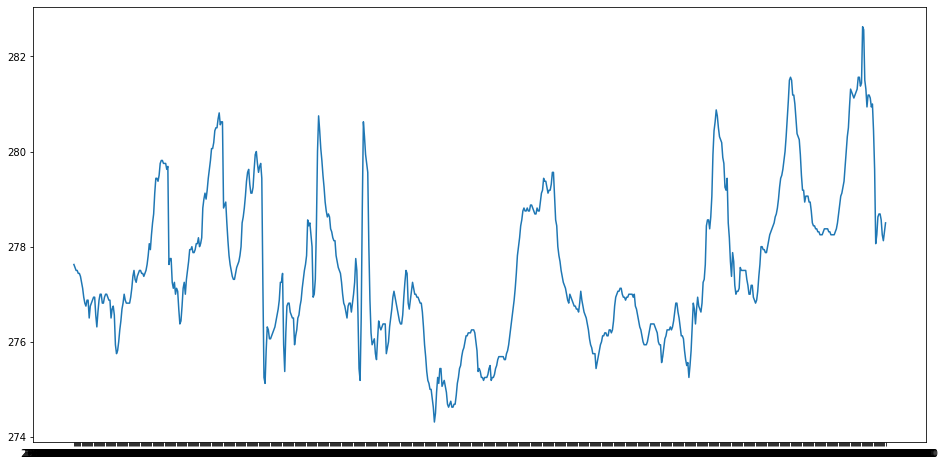

In [35]:
fig1 = matplotlib.pyplot.figure(figsize=(16,8))
ax1 = fig1.add_subplot(1,1,1)
ax1.plot([str(i1.point) for i1 in temp_ts.coord('time').cells()], temp_ts.data.data)

### CMIP6

Modelling different scenarios
Climate model as an experiment
Standard dataset for future climate
used as input for IPCC reports that feed into COP UN Framework Convention of Climate Change

How to access CMIP6 data through AWS and intake

In [9]:
import pathlib
import datetime

In [62]:
import matplotlib
import matplotlib.pyplot

In [66]:
import iris
import iris.coord_categorisation
import iris.quickplot
import cartopy
import cartopy.crs

In [ ]:
# define paramters for access CMIP6

In [ ]:
# load some data for different scenarios

In [ ]:
# calculate monthly means for different years for multiple ensemble memebers

In [ ]:
# calculate a time a series for Exeter? UK? 

### UK Climate Projections

https://www.metoffice.gov.uk/research/approach/collaboration/ukcp/index

Climate projections for the next 100 years

In [ ]:
#Met Office stuff
root_dir = '/project/ukcp/land-cpm/uk/2.2km/rcp85'


In [ ]:
path1 = f's3://{era5_bucket}/2019/01/data/air_temperature_at_2_metres.nc'

In [ ]:
fileObj1 = fs1.open(path1)

In [42]:
selected_var = 'tasmax'
ensemble_member_list = [1,4,5,6,7,8,9,10,11,12,13,15]
ensemble_member = ensemble_member_list[0]
data_version = 'v20190731'
scenario = 'rcp85'
data_category = 'land-cpm'
selected_area = 'uk'
res = '2.2km'
freq = 'day'
format_ext = 'nc'

In [43]:
start_date = datetime.datetime(2020,12,1)
end_date = datetime.datetime(2021,11,30)

In [44]:
start_date_str = f'{start_date.year:04d}{start_date.month:02d}{start_date.day:02d}'
end_date_str = f'{end_date.year:04d}{end_date.month:02d}{end_date.day:02d}'

In [45]:
fname1 = f'{selected_var}_{scenario}_{data_category}_{selected_area}_{res}_{ensemble_member:02d}_{freq}_{start_date_str}-{end_date_str}.{format_ext}'
data_path1 = pathlib.Path(root_dir) / f'{ensemble_member:02d}' / selected_var / 'day' / data_version / fname1
data_path1

PosixPath('/project/ukcp/land-cpm/uk/2.2km/rcp85/01/tasmax/day/v20190731/tasmax_rcp85_land-cpm_uk_2.2km_01_day_20201201-20211130.nc')

In [48]:
temp_cube_2020_01 = iris.load_cube(str(data_path1))
temp_cube_2020_01

Air Temperature (degC),ensemble_member,time,grid_latitude,grid_longitude
Shape,1,360,606,484
Dimension coordinates,,,,
ensemble_member,x,-,-,-
time,-,x,-,-
grid_latitude,-,-,x,-
grid_longitude,-,-,-,x
Auxiliary coordinates,,,,
ensemble_member_id,x,-,-,-
month_number,-,x,-,-
year,-,x,-,-


In [54]:
iris.coord_categorisation.add_season(temp_cube_2020_01, 'time', name='clim_season')

In [60]:
temp_seasonal_means = temp_cube_2020_01.aggregated_by(['clim_season'], iris.analysis.MEAN)
[i1 for i1 in temp_seasonal_means.coord('time').cells()]

[Cell(point=cftime.Datetime360Day(2021, 1, 16, 0, 0, 0, 0), bound=(cftime.Datetime360Day(2020, 12, 1, 0, 0, 0, 0), cftime.Datetime360Day(2021, 3, 1, 0, 0, 0, 0))),
 Cell(point=cftime.Datetime360Day(2021, 4, 16, 0, 0, 0, 0), bound=(cftime.Datetime360Day(2021, 3, 1, 0, 0, 0, 0), cftime.Datetime360Day(2021, 6, 1, 0, 0, 0, 0))),
 Cell(point=cftime.Datetime360Day(2021, 7, 16, 0, 0, 0, 0), bound=(cftime.Datetime360Day(2021, 6, 1, 0, 0, 0, 0), cftime.Datetime360Day(2021, 9, 1, 0, 0, 0, 0))),
 Cell(point=cftime.Datetime360Day(2021, 10, 16, 0, 0, 0, 0), bound=(cftime.Datetime360Day(2021, 9, 1, 0, 0, 0, 0), cftime.Datetime360Day(2021, 12, 1, 0, 0, 0, 0)))]

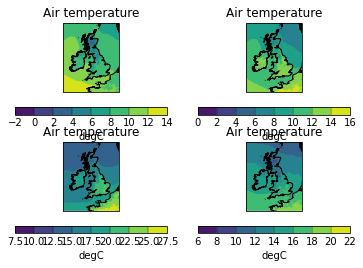

In [75]:
matplotlib.pyplot.subplot(2,2,1)
iris.quickplot.contourf(temp_seasonal_means[0,0,:,:])
matplotlib.pyplot.gca().coastlines()
matplotlib.pyplot.subplot(2,2,2)
iris.quickplot.contourf(temp_seasonal_means[0,1,:,:])
matplotlib.pyplot.gca().coastlines()
matplotlib.pyplot.subplot(2,2,3)
iris.quickplot.contourf(temp_seasonal_means[0,2,:,:])
matplotlib.pyplot.gca().coastlines()
matplotlib.pyplot.subplot(2,2,4)
iris.quickplot.contourf(temp_seasonal_means[0,3,:,:])
matplotlib.pyplot.gca().coastlines()

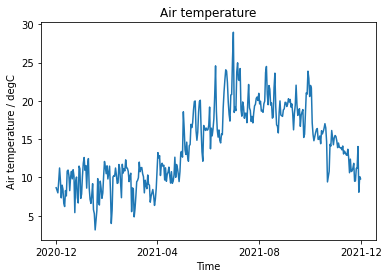

In [99]:
iris.quickplot.plot(temp_cube_2020_01[0,:,129,234])

Download UKCP from CEDA
* rss https://data.ceda.ac.uk/badc/ukcp18/data/land-cpm/uk/2.2km/rcp85/15/rss/day/v20190731
* sfcWind https://data.ceda.ac.uk/badc/ukcp18/data/land-cpm/uk/2.2km/rcp85/15/sfcWind/day/v20190731
* tasmax https://data.ceda.ac.uk/badc/ukcp18/data/land-cpm/uk/2.2km/rcp85/15/tasmax/day/v20190731
* tasmin https://data.ceda.ac.uk/badc/ukcp18/data/land-cpm/uk/2.2km/rcp85/15/tasmin/day/v20190731

### Interactively exploring local climate change

BBC tools to see how local areas will be affected, based on UKCP
https://www.bbc.co.uk/news/resources/idt-d6338d9f-8789-4bc2-b6d7-3691c0e7d138
